# **Churn Analysis**

## **1. Introduction**

Churn analysis is a critical task for businesses, especially in industries where customer retention is essential. In this analysis, we will perform the following tasks:

* Load and explore the dataset.
* Preprocess the data.
* Apply Principal Component Analysis (PCA) for dimensionality reduction.
* Use K-Means clustering to segment customers.
* Visualize the results.

## **2. Data Loading and Exploration**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **2.1. Load the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

### **2.2. Summary Statistics**

In [3]:
# Display summary statistics
print("Summary Statistics of the Dataset:")
print(df.describe())

Summary Statistics of the Dataset:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.

## **3. Data Preprocessing**
Before performing any analysis, it's essential to preprocess the data. We will:

* Select relevant features.
* Standardize the data.

### **3.1. Feature Selection**
We will select relevant features for our analysis, such as 'CreditScore,' 'Age,' 'Balance,' and 'NumOfProducts.'

In [4]:
# Select relevant features for PCA
features_for_pca = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']

### **3.2. Data Standardization**
Standardizing the data ensures that features are on the same scale, which is crucial for PCA and K-Means clustering.

In [5]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_pca])

## **4. Principal Component Analysis (PCA)**
PCA is a technique used for dimensionality reduction. We will apply PCA to reduce the number of features while retaining as much information as possible.

### **4.1. Perform PCA**
We will perform PCA to obtain two principal components, 'PC1' and 'PC2.

In [6]:
# Perform PCA to obtain principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

## **5. K-Means Clustering**
K-Means clustering is used to group similar data points together. We will apply K-Means clustering to our dataset.

### **5.1. Perform K-Means Clustering**

In [7]:
# Perform K-Means clustering on the principal components
kmeans = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **6. Data Visualization**
Visualizing the results is essential for gaining insights from our analysis. We will create various visualizations.

### **6.1. Scatterplot of Clusters**

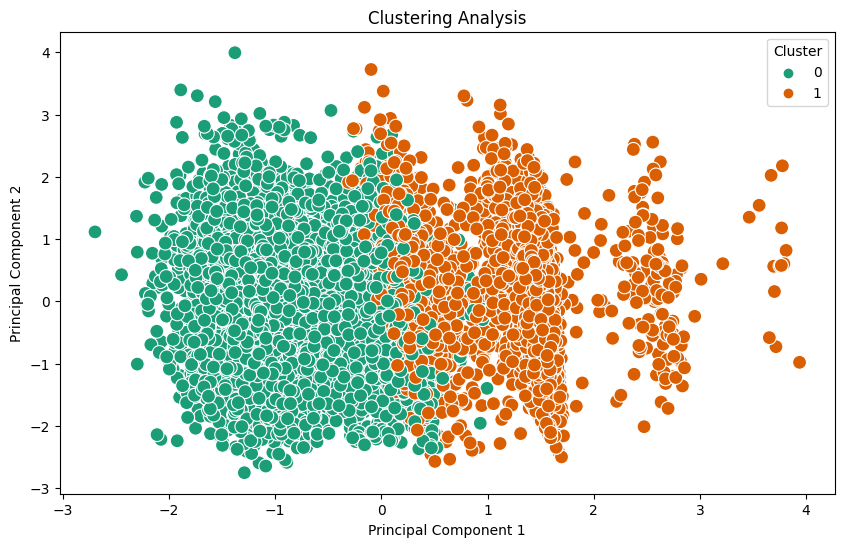

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Dark2', s=100)
plt.title('Clustering Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### **6.2. Age Group Analysis**

In [9]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 35, 65, np.inf], labels=['Young', 'Middle-Aged', 'Old'])

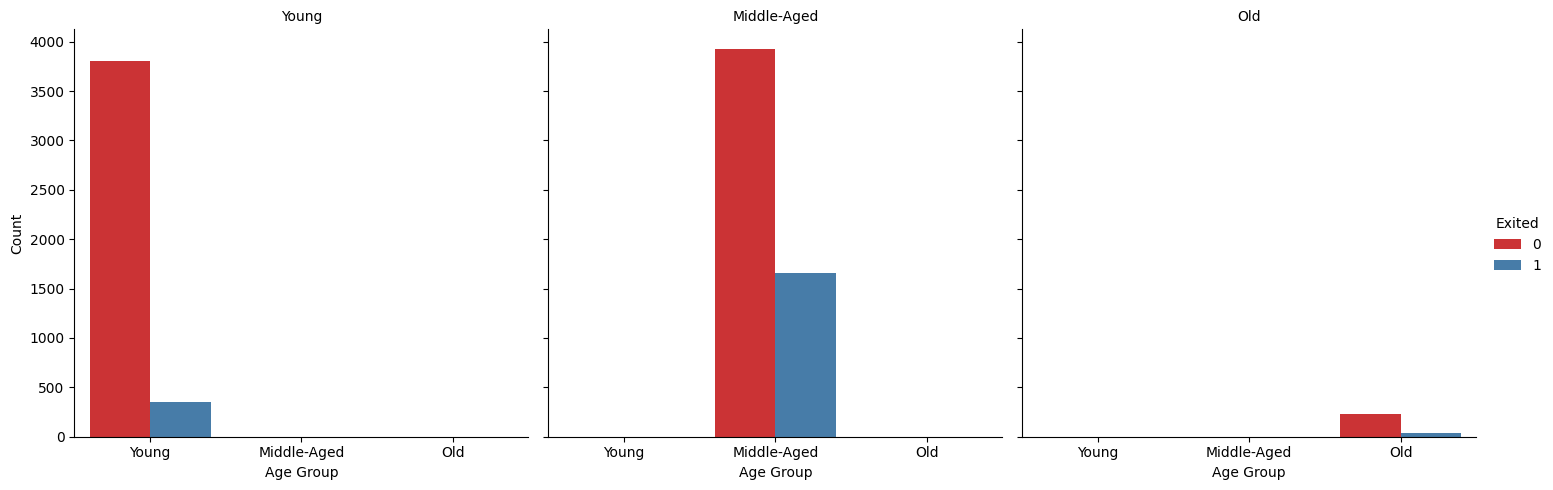

In [10]:
# Create a faceted bar plot
g = sns.catplot(x='AgeGroup', hue='Exited', col='AgeGroup', data=df, kind='count', palette='Set1')
g.set_axis_labels('Age Group', 'Count')
g.set_titles('{col_name}')

### **6.3. Gender vs. Churn**

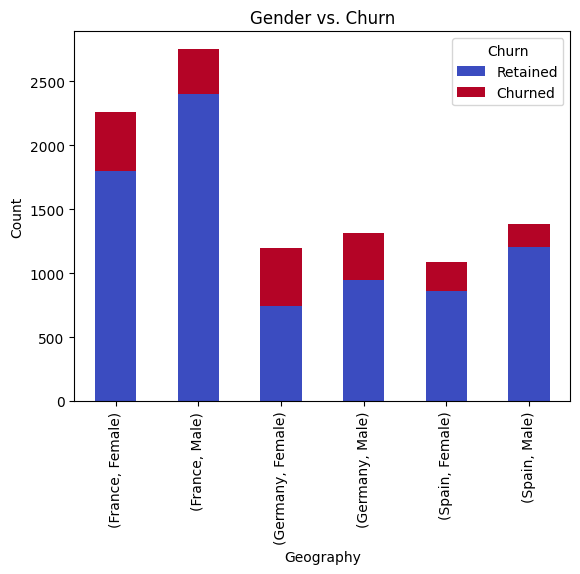

In [11]:
# Create a stacked bar plot for gender vs. churn
gender_churn = df.groupby(['Geography', 'Gender', 'Exited']).size().unstack().fillna(0)
gender_churn.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Gender vs. Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

### **6.4. Account Balance vs. Churn**

In [12]:
# Create a new categorical variable for zero balance
df['ZeroBalance'] = df['Balance'].apply(lambda x: 'Zero' if x == 0 else 'Nonzero')

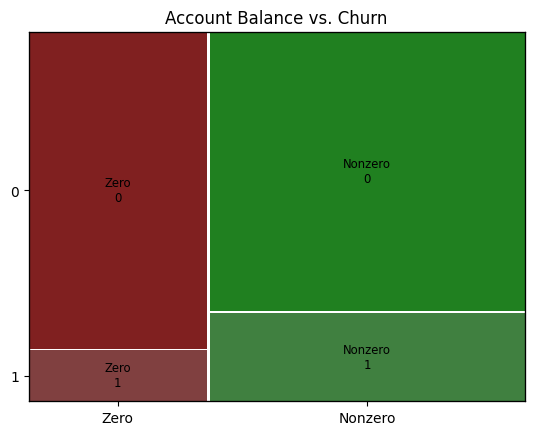

In [13]:
# Create a mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['ZeroBalance', 'Exited'], title='Account Balance vs. Churn')
plt.show()


## **7. Conclusion**

This concludes the data analysis and visualization for the "Churn Analysis" component of the "Bank Churn Analysis Insights" project. We have explored customer churn from various angles, including principal component analysis, clustering, age groups, gender, and account balance.